**Import packages**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**Generate dataset**

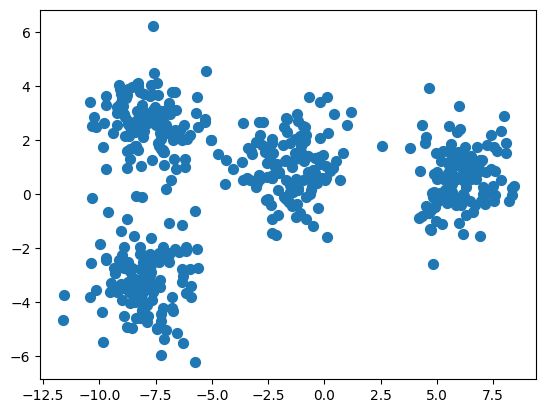

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=1.1, random_state=999)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, ec='black', fc='lightgray',
                                lw=3, alpha=0.5, zorder=1))

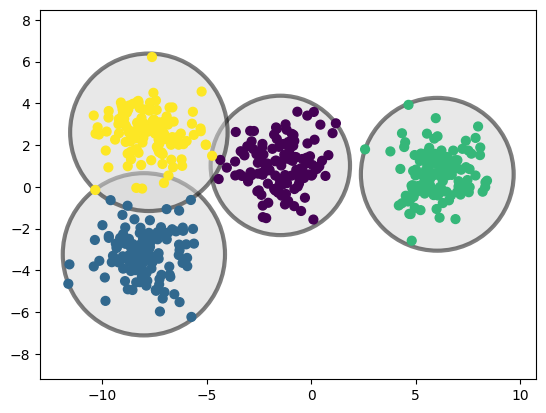

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

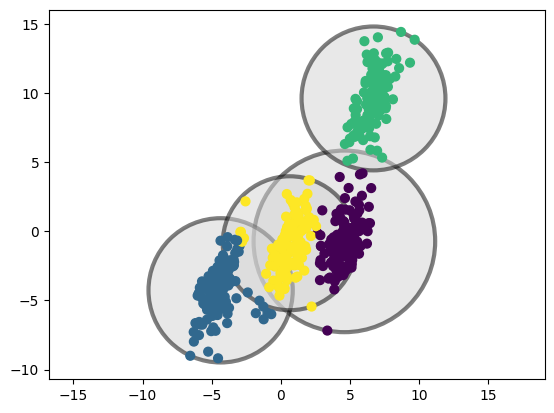

In [5]:
rng = np.random.RandomState(1337)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=999)
plot_kmeans(kmeans, X_stretched)

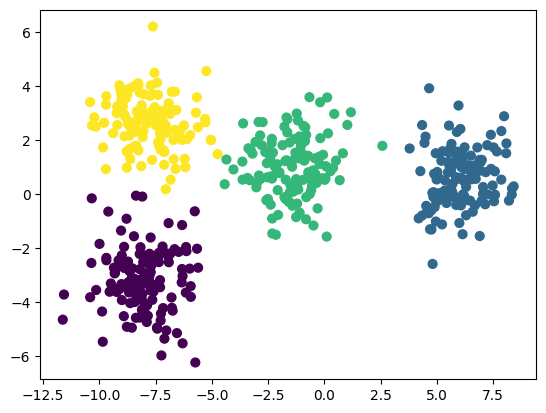

In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [7]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[1.    0.    0.    0.   ]
 [0.032 0.    0.001 0.968]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]]


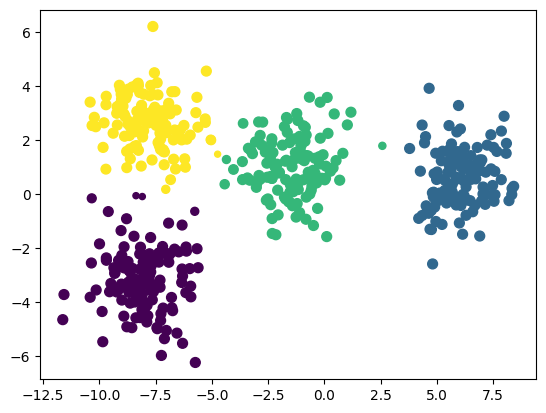

In [8]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [9]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

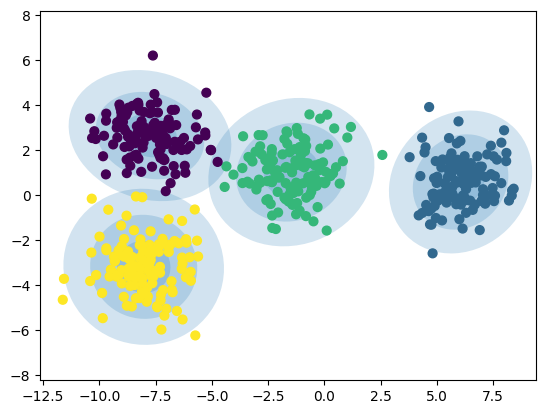

In [10]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

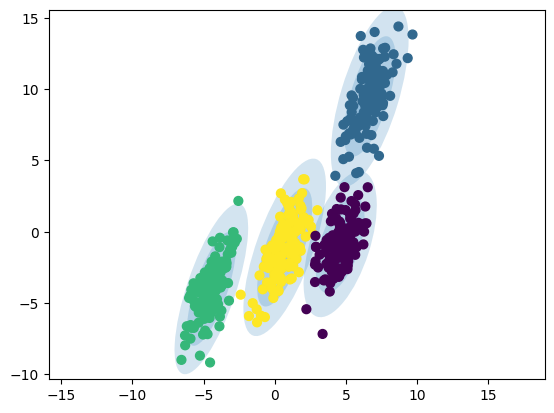

In [11]:
gmm_stretched = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm_stretched, X_stretched)

**Clustering Quality Metrics**

In [12]:
y_true

array([2, 1, 0, 0, 1, 0, 1, 3, 0, 3, 2, 0, 3, 1, 2, 2, 0, 1, 2, 0, 2, 3,
       0, 1, 3, 3, 3, 3, 0, 1, 0, 2, 3, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1,
       1, 2, 1, 0, 3, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 3, 3, 3, 3, 3,
       2, 2, 3, 0, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 1, 2, 3, 0, 3, 2, 2, 2,
       1, 1, 3, 3, 2, 3, 3, 1, 3, 0, 2, 2, 1, 2, 0, 0, 3, 1, 2, 3, 0, 2,
       1, 2, 1, 3, 3, 1, 2, 3, 0, 0, 2, 2, 1, 2, 2, 3, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 1, 3, 0, 0, 1, 1, 1, 3, 3, 1, 3, 0, 1, 3, 0, 1, 3, 3, 1,
       0, 0, 3, 3, 1, 0, 2, 3, 1, 2, 3, 2, 2, 0, 1, 0, 2, 3, 1, 2, 2, 1,
       0, 2, 1, 2, 0, 2, 2, 3, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 3, 0, 1, 3,
       2, 1, 3, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 3, 1,
       1, 1, 3, 2, 3, 0, 1, 2, 3, 1, 2, 0, 0, 2, 2, 3, 0, 1, 2, 0, 2, 3,
       1, 0, 0, 3, 0, 3, 0, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 1, 3, 1, 0, 2,
       2, 1, 1, 1, 0, 3, 0, 1, 0, 3, 3, 0, 1, 3, 0, 3, 1, 3, 0, 2, 1, 1,
       0, 0, 0, 3, 0, 1, 2, 1, 1, 2, 2, 0, 0, 3, 1,

In [13]:
cluster_labels = gmm.predict(X)
cluster_labels

array([3, 0, 1, 1, 0, 1, 0, 2, 1, 2, 3, 1, 2, 0, 3, 3, 1, 0, 3, 1, 3, 2,
       1, 0, 2, 2, 2, 2, 1, 0, 1, 3, 2, 1, 3, 3, 3, 3, 0, 3, 0, 1, 0, 0,
       0, 3, 0, 1, 2, 3, 1, 1, 0, 1, 3, 0, 1, 1, 1, 0, 3, 2, 2, 2, 2, 2,
       3, 3, 2, 1, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 0, 3, 2, 1, 2, 3, 3, 3,
       0, 0, 2, 2, 3, 2, 2, 0, 2, 1, 3, 3, 0, 3, 1, 1, 2, 0, 3, 2, 1, 3,
       0, 3, 0, 2, 2, 0, 3, 2, 1, 1, 3, 3, 0, 3, 3, 2, 1, 3, 3, 1, 0, 1,
       3, 3, 1, 0, 2, 1, 1, 3, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0,
       1, 1, 2, 2, 0, 1, 3, 2, 0, 3, 2, 3, 3, 1, 0, 1, 3, 2, 0, 3, 3, 0,
       1, 3, 0, 3, 1, 3, 3, 2, 3, 3, 0, 0, 0, 3, 1, 3, 0, 0, 2, 1, 0, 2,
       3, 0, 2, 0, 3, 1, 1, 0, 0, 1, 0, 3, 1, 0, 3, 3, 3, 0, 3, 0, 2, 3,
       0, 0, 2, 3, 2, 1, 0, 3, 2, 0, 3, 1, 1, 3, 3, 2, 1, 0, 3, 1, 3, 2,
       0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 3,
       3, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 3, 0, 0,
       1, 1, 1, 2, 1, 0, 3, 0, 0, 3, 3, 1, 1, 2, 3,

In [14]:
from scipy.stats import mode

labels = np.zeros_like(cluster_labels)
for i in range(10):
    mask = (cluster_labels == i)
    labels[mask] = mode(y_true[mask])[0]

<ipython-input-14-0c9f404c3944>:6: RuntimeWarning: invalid value encountered in cast
  labels[mask] = mode(y_true[mask])[0]


In [15]:
labels

array([2, 1, 0, 0, 1, 0, 1, 3, 0, 3, 2, 0, 3, 1, 2, 2, 0, 1, 2, 0, 2, 3,
       0, 1, 3, 3, 3, 3, 0, 1, 0, 2, 3, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1,
       1, 2, 1, 0, 3, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 3, 3, 3, 3, 3,
       2, 2, 3, 0, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 1, 2, 3, 0, 3, 2, 2, 2,
       1, 1, 3, 3, 2, 3, 3, 1, 3, 0, 2, 2, 1, 2, 0, 0, 3, 1, 2, 3, 0, 2,
       1, 2, 1, 3, 3, 1, 2, 3, 0, 0, 2, 2, 1, 2, 2, 3, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 1, 3, 0, 0, 2, 1, 1, 3, 3, 1, 3, 0, 1, 3, 0, 1, 3, 3, 1,
       0, 0, 3, 3, 1, 0, 2, 3, 1, 2, 3, 2, 2, 0, 1, 0, 2, 3, 1, 2, 2, 1,
       0, 2, 1, 2, 0, 2, 2, 3, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 3, 0, 1, 3,
       2, 1, 3, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 3, 2,
       1, 1, 3, 2, 3, 0, 1, 2, 3, 1, 2, 0, 0, 2, 2, 3, 0, 1, 2, 0, 2, 3,
       1, 0, 0, 3, 0, 3, 0, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 1, 3, 1, 0, 2,
       2, 1, 1, 1, 0, 3, 0, 1, 0, 3, 3, 0, 1, 3, 0, 3, 1, 3, 0, 2, 1, 1,
       0, 0, 0, 3, 0, 1, 2, 1, 1, 2, 2, 0, 0, 3, 2,

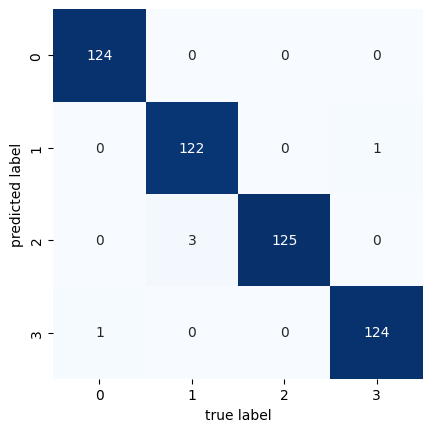

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, labels, labels=[0,1,2,3])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)

0.99